## Assignment 1.1: Exploring WS and BA models

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

The problem with random networks is that they don't predict the real world well. The expected maximum and minimum degree of nodes lies around the average degree. This contrasts the observation of the real world where so-called hubs with a larger amount of links, and also nodes with a very low amount of links are much more common in real world networks compared to random ones.

**List the four regimes that characterize random networks as a function of  ⟨k⟩
 .**

The four regimes characterizing random networks are the following:

### Subcritical Regime: 0 ‹ ‹k› ‹ 1
The network consists of several tiny connected components, but there is no emergence of a giant one. The size of the largest component increases slower than the size of the network. As a result this relative size of the largest component is zero (as we increase N).

### Critical Point: ‹k› = 1 
A "phase change" occurs here with the emergence of a giant component after ‹k› > 1. It is important to note that at this point the relative size of the larges component is still zero (as we increase N). 

### Supercritical Regime: ‹k› › 1
There is a giant component that looks like a network, and contains a small fraction of the nodes. This giant component coexists with smaller isolated components.

### Connected Regime: ‹k› › lnN 
In this regime the giant component includes all nodes, and the network is connected.


**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering  C(k) decreases as a function of  k
in real-world networks?**

Because this observation within real world networks (e.g. protein interactions, science collaboration, etc.) is in contrast with the predictions of the random network, which shows that this *shouldn't* decrease. Random networks predict that the clustering coefficient is not dependent on k. This is also well illustrated in the book in Section 3.9 Image 3.13.

**First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity  p=0,0.1,
  and  1
 . Calculate the average shortest path length  ⟨d⟩
  for each one.**

In [1]:
import networkx as nx
G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

In [17]:
avg_shortest_path_G1 = nx.average_shortest_path_length(G1)
avg_shortest_path_G2 = nx.average_shortest_path_length(G2)
avg_shortest_path_G3 = nx.average_shortest_path_length(G3)

print(f"Average shortest path for p=0, 0.1, 1: {avg_shortest_path_G1, avg_shortest_path_G2, avg_shortest_path_G3}")

Average shortest path for p=0, 0.1, 1: (62.875751503006015, 7.772569138276553, 4.764112224448898)


**Describe what happens to the network when  p=1.**

With p=1 we get essentially a random network, as every link is rewired from the original lattice structure. We can observe the average shortest path decreasing which shows how the random network is able to model the small world property better.

**Generate a lot of networks with different values of  p
 . You will notice that paths are short when  p
  is close to one and they are long when  p=0
 . What's the value of  p
  for which the average shortest path length gets close to the short paths we find in a fully randomized network.**

In [ ]:
import random
prob_findings = {}
prob = 0.00
#try 100 different probabilities from 0 to 1
for i in range(100):
    G = nx.watts_strogatz_graph(500, 4, prob)
    prob_findings[prob] = nx.average_shortest_path_length(G)
    prob += 0.01

In [21]:
sorted_probs = sorted(list(prob_findings.items()), key=lambda x: x[0])


Let's define being "close" in terms of length as the length of the paths are within 1.

In [20]:
for p in sorted_probs:
    if abs(p[1] - avg_shortest_path_G3) < 1:
        print(f"p value close to p=1 average shortest path at probability {p[0]} with average shortest path {p[1]}")
        break

p value close to p=1 average shortest path at probability 0.26000000000000006 with average shortest path 5.6545571142284565


At already p=0.26 we are within 1 distance of the average shortest path of the fully random network. The closer we get to p=1, the closer the average shortest path is to the one observed in random networks

**Let's investigate this behavior in detail. Generate 50 networks with  N=500
 ,  ⟨k⟩=4
 , for each of  p={0,0.01,0.03,0.05,0.1,0.2}
 . Calculate the average of  ⟨d⟩
  as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

In [23]:
import numpy as np
probs = [0, 0.01, 0.03, 0.05, 0.1, 0.2 ]
prob_findings = {}

for p in probs:
    samples = []
    #50 samples for each probability
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        samples.append(nx.average_shortest_path_length(G))

    avg_path = np.mean(samples)
    std_path = np.std(samples)
    prob_findings[p] = (avg_path, std_path)



In [24]:
print(f"{prob_findings}")

{0: (np.float64(62.87575150300602), np.float64(7.105427357601002e-15)), 0.01: (np.float64(24.125293787575153), np.float64(5.092803301453433)), 0.03: (np.float64(13.220029498997997), np.float64(1.5317102809957828)), 0.05: (np.float64(10.315917915831665), np.float64(0.6908600496284696)), 0.1: (np.float64(7.708141883767535), np.float64(0.28001559493279776)), 0.2: (np.float64(6.10784144288577), np.float64(0.11527495404397985))}


Text(0, 0.5, 'Average Shortest Path Length')

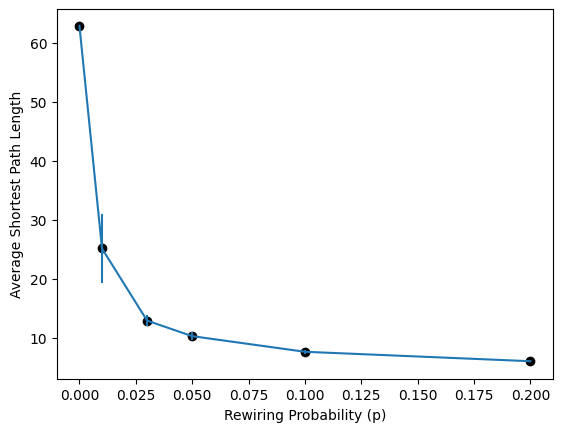

In [ ]:
from matplotlib import pyplot as plt
x = list(prob_findings.keys())
y = [prob_findings[p][0] for p in x] #average shortest path
yerr = [prob_findings[p][1] for p in x] #std deviation for each
plt.errorbar(x, y, yerr=yerr)
plt.scatter(x, y, color='black')
plt.xlabel('Rewiring Probability (p)')
plt.ylabel('Average Shortest Path Length')

The figure above shows how the average shortest path length decreases as we increase the rewiring probability. It is interesting to see how steep the initial decrease is from p=0 to p=0.05. This means with only a few rewirings we are able to capture the small world property significantly better.